In [1]:
import pandas as pd
import os
os.chdir("C:\\Users\\Asus\\Downloads")
df=pd.read_csv("PlayTennis.csv")

In [2]:
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [4]:
df.rename(columns={'Play Tennis':'Play_Tennis'}, inplace =True)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
Outlook=LabelEncoder()
Temperature=LabelEncoder()
Humidity=LabelEncoder()
Wind=LabelEncoder()
Play_Tennis=LabelEncoder()

In [7]:
df["Outlook"]=Outlook.fit_transform(df["Outlook"])
df["Temperature"]=Temperature.fit_transform(df["Temperature"])
df["Humidity"]=Humidity.fit_transform(df["Humidity"])
df["Wind"]=Wind.fit_transform(df["Wind"])
df["Play_Tennis"]=Play_Tennis.fit_transform(df["Play_Tennis"])

In [8]:
df.head() 
# 2 is Sunny, 0 is Overcast and 1 is Rain (Outlook)
# 1 is Hot , 2 is Mild and 0 is Cool (Temperature)
# 0 is High and 1 is Normal (Humidity)
# 1 is Weak and 0 is Strong (Wind)
# 0 is No and 1 is Yes (Play_Tennis)

,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [9]:
x=df[["Outlook","Temperature","Humidity","Wind"]]
y=df["Play_Tennis"]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
clf=DecisionTreeClassifier(criterion="gini")

In [13]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred=clf.predict(x_test)

In [15]:
clf.score(x_test,y_test)

0.6

In [16]:
x_test

,Outlook,Temperature,Humidity,Wind
9,1,2,1,1
11,0,2,0,0
0,2,1,0,1
12,0,1,1,1
5,1,0,1,0


In [17]:
y_test

9     1
11    1
0     0
12    1
5     0
Name: Play_Tennis, dtype: int32

In [18]:
clf.predict([[0,1,1,1]]) # good prediction

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Classification Report: ",classification_report(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))

Accuracy:  0.6
Classification Report:                precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

Confusion Matrix:  [[1 1]
 [1 2]]


In [21]:
from sklearn import tree

[Text(0.6666666666666666, 0.875, 'x[2] <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.5, 0.625, 'x[0] <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.3333333333333333, 0.375, 'x[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

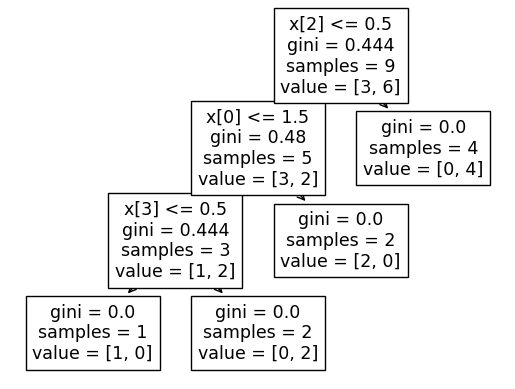

In [22]:
tree.plot_tree(clf)